In [2]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [3]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

with pd.ExcelWriter("../retail/transactions.xlsx") as writer:
    for year in range(2013, 2018):
        transactions.loc[transactions["date"].dt.year == year].to_excel(
            writer, sheet_name=str(year)
        )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [4]:
transactions_2014 = pd.read_excel(
    '../retail/transactions.xlsx',
    sheet_name='2014'
)

transactions_2015 = pd.read_excel(
    '../retail/transactions.xlsx',
    sheet_name='2015'
)

In [5]:
pd.concat(
    [transactions_2014, transactions_2015],
    ignore_index=True
)

,Unnamed: 0,date,store_nbr,transactions
0,16908,2014-01-01,25,840
1,16909,2014-01-01,36,487
2,16910,2014-01-02,1,1875
3,16911,2014-01-02,2,2122
4,16912,2014-01-02,3,3350
...,...,...,...,...
35479,52387,2015-12-31,49,3828
35480,52388,2015-12-31,50,2948
35481,52389,2015-12-31,51,2892
35482,52390,2015-12-31,53,2300


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [6]:
retail = pd.read_csv('../retail/retail_2016_2017.csv')
stores = pd.read_csv('../retail/stores.csv')

In [15]:
retail_store = retail[['date','store_nbr','sales']].merge(
    stores[['store_nbr','city','type']],
    how='left',
    left_on='store_nbr',
    right_on='store_nbr'
)

<Axes: xlabel='date,type'>

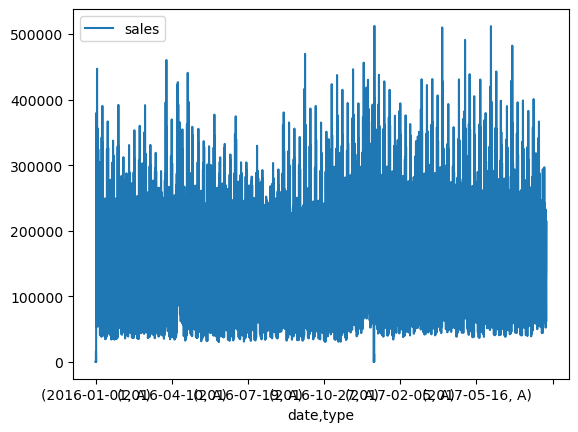

In [36]:
(
retail_store.groupby(['date','type']).agg({
    'sales': 'sum'
})
.round()
.plot()
)

In [ ]:
(
retail_store.groupby('city').agg({
    'sales': 'sum'
})
.round()
.sort_values(by='sales',ascending=False)
.plot.bar()
)